In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from yahoofinancials import YahooFinancials
import pandas as pd

# Select Tickers and stock history dates
ticker = 'AAPL'
ticker2 = 'MSFT'
ticker3 = 'INTC'
index = '^NDX'
freq = 'daily'
start_date = '2012-10-01'
end_date = '2017-10-01'


# Function to clean data extracts
def clean_stock_data(stock_data_list):
    new_list = []
    for rec in stock_data_list:
        if 'type' not in rec.keys():
            new_list.append(rec)
    return new_list

In [3]:
aapl_financials = YahooFinancials(ticker)
mfst_financials = YahooFinancials(ticker2)
intl_financials = YahooFinancials(ticker3)
index_financials = YahooFinancials(index)

# Clean returned stock history data and remove dividend events from price history
daily_aapl_data = clean_stock_data(aapl_financials
                                     .get_historical_stock_data(start_date, end_date, freq)[ticker]['prices'])
daily_msft_data = clean_stock_data(mfst_financials
                                     .get_historical_stock_data(start_date, end_date, freq)[ticker2]['prices'])
daily_intl_data = clean_stock_data(intl_financials
                                     .get_historical_stock_data(start_date, end_date, freq)[ticker3]['prices'])
daily_index_data = index_financials.get_historical_stock_data(start_date, end_date, freq)[index]['prices']
stock_hist_data_list = [{'NDX': daily_index_data}, {'AAPL': daily_aapl_data}, {'MSFT': daily_msft_data},
                        {'INTL': daily_intl_data}]


In [4]:
AAPL = pd.DataFrame(daily_aapl_data)
AAPL.sort_values('date', ascending =True, inplace=True)

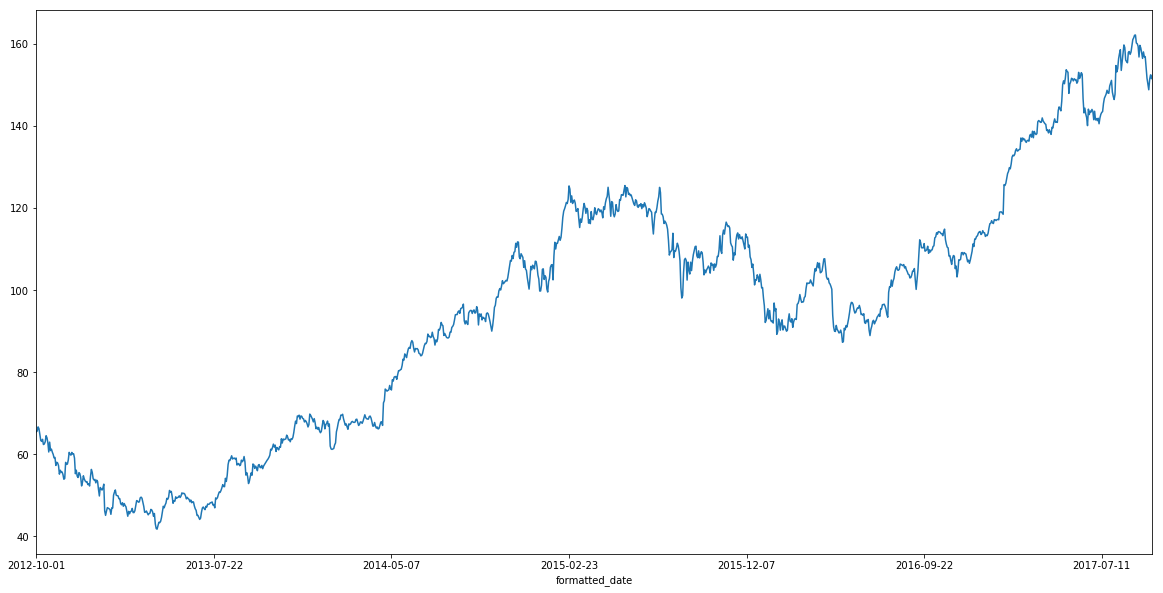

In [5]:
AAPL1 = AAPL.set_index('formatted_date')['adjclose'].plot(figsize=(20,10))
plt.show()